## Setup with Packages

In [1]:
# Clone the repository
# !git clone https://github.com/FERMat-ML/OMatG.git
%cd ../data-gen/OMatG

# Install the package and dependencies (using python -m pip to ensure venv installation)
!python -m pip install -e .
# Clone the repository
# !git clone https://github.com/FERMat-ML/OMatG.git
# %cd /Users/ethanlin/Downloads/Cursor_Code/omatg-haunting-atoms/OMatG

# Install the package and dependencies (using python -m pip to ensure venv installation)
!python -m pip install -e .
!python -m pip install "nbformat>=4.2.0"
!python -m pip install seaborn

/Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/data-gen/OMatG
Obtaining file:///Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/data-gen/OMatG
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for omg (pyproject.toml) ... done
  Created wheel for omg: filename=omg-1.0.1-0.editable-py3-none-any.whl size=13651 sha256=f8d19adbb5dfd66dad3c5dfcad2ca0db3beb2cb10954db40f3076390438347fd
  Stored in directory: /private/var/folders/xj/8d93_b314hd1dzzj26rqjrqr0000gp/T/pip-ephem-wheel-cache-h9qw4v0_/wheels/9a/ad/9a/849a4145168353189de2dde7f0e42e8cea5ef2f7b82c57c1d3
Successfully built omg
  Attempting uninstall: omg
    Found existing installation: omg 1.0.1
    Uninstalling omg-1.0.1:
      Successfully uninstalled omg-1.0.1

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To u

In [2]:
import sys
import os
import numpy as np

# Change this path to the path of the repository!!!!!!!!!!!!!!!!!
%cd /Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/ghosting-repo/
# /Users/ethanlin/Downloads/Cursor_Code/omatg-haunting-atoms/


notebook_dir = os.getcwd()
print(notebook_dir)
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)
print(sys.path)

from voronoi_weighted_noise import VoronoiPhantomCellGenerator
import freud
# create Voronoi Generator
VoronoiGenerator = VoronoiPhantomCellGenerator(
  desired_atom_count=20,
  dist_eval="avg_x_min",
  num_min_distances=3,
  epsilon=1e-3,
  weight_distances=False
)

/Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/ghosting-repo
/Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/ghosting-repo
['/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/ghosting-atoms/omg-venv/lib/python3.11/site-packages', '__editable__.omg-1.0.1.finder.__path_hook__', '/Users/kosta/Documents/Research/martiniani/omatg_TomEgg/code/ghosting-repo']


## Useful Function Cells

Plot Function

In [3]:
import pandas as pd
import plotly.graph_objects as go

def plot_crystal_with_points(single_data, idx, title=None):
  """
  Plots a crystal structure with original and ghost points.

  Args:
      single_data: A data object containing cell, positions, and species.
      idx: The index of the sample being plotted.
  """
  cell = single_data.cell[0].numpy()
  x_vec, y_vec, z_vec = cell[0], cell[1], cell[2]

  # Assuming that positions are in cartesian coords not fractional coords
  positions = single_data.pos.numpy()
  species = single_data.species.numpy()

  # Create DataFrames for both original and ghost points
  df_points = pd.DataFrame(positions, columns=['x', 'y', 'z'])
  df_points['species'] = species
  df_points['type'] = df_points['species'].apply(lambda s: 'Original Points' if s != -1 else 'Ghost Points')

  # --- START of programmatic color and size mapping ---
  import plotly.express as px
  import matplotlib.pyplot as plt

  # Normalize atomic numbers to the range [0, 1] for the color scale
  # We add 1 to handle the ghost atom at -1 correctly
  norm = plt.Normalize(vmin=-1, vmax=df_points['species'].max())
  
  # Get a color from the 'Viridis' color scale
  colorscale = px.colors.sequential.Viridis
  df_points['color'] = [px.colors.sample_colorscale(colorscale, val)[0] for val in norm(df_points['species'])]
  
  # Make ghost atoms red
  df_points.loc[df_points['species'] == -1, 'color'] = 'red'

  # Programmatically determine size (e.g., linear scaling)
  # Base size of 6, increasing with atomic number
  df_points['size'] = 6 + (df_points['species'] + 1) * 0.75
  # --- END of programmatic color and size mapping ---

  # Create the custom hover text
  df_points['hover_text'] = df_points.apply(
      lambda row: f"A_n: {row['species']}<br>Pos: ({row['x']:.2f}, {row['y']:.2f}, {row['z']:.2f})",
      axis=1
  )


  # Create figure
  fig = go.Figure()

  # Add scatter points for all points, using mapped color and size
  fig.add_trace(go.Scatter3d(
      x=df_points['x'],
      y=df_points['y'],
      z=df_points['z'],
      mode='markers',
      marker=dict(
          size=df_points['size'],
          color=df_points['color'],
          opacity=0.6
      ),
      name='Atoms', # Combined legend entry
      hovertext=df_points['hover_text'],
      hoverinfo='text'
  ))


  # Define the 8 vertices of the parallelepiped
  origin = np.array([0, 0, 0])
  vertices = [
      origin,                          # 0: (0,0,0)
      x_vec,                          # 1: x_vec
      y_vec,                          # 2: y_vec
      z_vec,                          # 3: z_vec
      x_vec + y_vec,                  # 4: x_vec + y_vec
      x_vec + z_vec,                  # 5: x_vec + z_vec
      y_vec + z_vec,                  # 6: y_vec + z_vec
      x_vec + y_vec + z_vec          # 7: x_vec + y_vec + z_vec
  ]

  # Define the 12 edges (pairs of vertex indices to connect)
  edges = [
      (0, 1), (0, 2), (0, 3),  # edges from origin
      (1, 4), (1, 5),          # edges from x_vec
      (2, 4), (2, 6),          # edges from y_vec
      (3, 5), (3, 6),          # edges from z_vec
      (4, 7), (5, 7), (6, 7)   # edges to opposite corner
  ]

  # Draw each edge
  for i, j in edges:
      v1, v2 = vertices[i], vertices[j]
      fig.add_trace(go.Scatter3d(
          x=[v1[0], v2[0]],
          y=[v1[1], v2[1]],
          z=[v1[2], v2[2]],
          mode='lines',
          line=dict(color='black', width=3),
          showlegend=False,
          hoverinfo='none'
      ))

  fig.update_layout(
      title=title or f'Sample {idx}: Newly Loaded Data',
      width=500,  # Width in pixels
      height=500,  # Height in pixels
      autosize=False,  # Disable autosize to use fixed dimensions
      scene=dict(
          xaxis_title='X',
          yaxis_title='Y',
          zaxis_title='Z'
      )
  )

  fig.show()


Data Downloader to LMDB

In [4]:
# extxyz:
from ase import Atoms
from ase.io import read, write
from typing import Union
from pathlib import Path
from omg.datamodule.dataloader import OMGData
import torch
import os


def xyz_saver(data: Union[OMGData, list[OMGData]], filename: Path) -> None:
    """
    Save structures from OMGData instances to an extxyz file.
    Correctly handles a list of single data objects and stores ghost
    atom information (-1) in a separate array to avoid data loss.
    """
    if not filename.suffix == ".extxyz":
        raise ValueError("The filename must have the suffix '.extxyz'.")
    
    if not isinstance(data, list):
        data = [data]

    atoms_list = []
    for d in data:
        # Get species and convert to numpy array
        species_np = d.species.cpu().numpy().copy()

        # Create a boolean array to mark ghost atoms
        is_ghost = species_np == -1

        # Replace -1 with 0 for ghost atoms (XYZ format compatibility)
        # 0 corresponds to the 'X' dummy atom in ASE.
        species_np[is_ghost] = 0

        atoms = Atoms(
            numbers=species_np,
            positions=d.pos.cpu().numpy(),
            cell=d.cell[0].cpu().numpy(),
            pbc=True,
        )

        # Attach the ghost atom information as a per-atom array
        atoms.set_array("is_ghost", is_ghost)
        atoms_list.append(atoms)

    # Overwrite the file with the new list of atoms.
    os.makedirs(filename.parent, exist_ok=True)
    # The format is inferred from the filename suffix '.extxyz'
    write(filename, atoms_list, append=False)


def convert_xyz_to_lmdb(input_xyz_file: Path, output_lmdb_file: Path) -> None:
    """Converts an ASE-readable extxyz file to a single-file LMDB database."""
    if not input_xyz_file.exists():
        print(f"Error: Input file not found at {input_xyz_file}")
        return

    try:
        # ASE automatically handles .extxyz and reads the extra arrays
        atoms_list = read(input_xyz_file, index=":")
        print(f"Read {len(atoms_list)} structures from '{input_xyz_file}'")
    except Exception as e:
        print(f"Error reading EXYZ file: {e}")
        return

    env = lmdb.open(str(output_lmdb_file), subdir=False, map_size=int(1e12))
    with env.begin(write=True) as txn:
        for i, atoms in enumerate(atoms_list):
            key = str(i).encode("utf-8")

            atomic_numbers = atoms.get_atomic_numbers()

            # Check if ghost atom info is present and restore -1
            if "is_ghost" in atoms.arrays:
                is_ghost = atoms.get_array("is_ghost")
                atomic_numbers[is_ghost] = -1

            value = {
                "atomic_numbers": torch.from_numpy(atomic_numbers),
                "pos": torch.from_numpy(atoms.get_positions()).to(dtype=torch.float64),
                "cell": torch.from_numpy(atoms.get_cell()[:]).to(dtype=torch.float64),
                "pbc": torch.tensor(atoms.get_pbc(), dtype=torch.bool),
            }
            serialized_value = pickle.dumps(value)
            txn.put(key, serialized_value)
    env.close()
    print(f"Successfully created single-file LMDB: '{output_lmdb_file}'")


def save_atoms_to_lmdb(
    data: Union[OMGData, list[OMGData]], xyz_filename: Path, lmdb_filename: Path
) -> None:
    """
    Saves atomic data to a single-file LMDB by first saving to an
    intermediate EXYZ file and then converting.
    """
    print(
        f"--- Starting save process: Atoms -> EXYZ -> LMDB ---"
    )
    # Step 1: Save the data to an EXYZ file
    xyz_saver(data, xyz_filename)
    print(f"Successfully saved intermediate file: '{xyz_filename}'")

    # Step 2: Convert the EXYZ file to an LMDB file
    convert_xyz_to_lmdb(xyz_filename, lmdb_filename)
    print(
        f"--- Save process complete ---"
    )

## Data Generation

In [8]:
import torch
import lmdb
from omg.datamodule import DataModule
from omg.datamodule.dataloader import OMGData

# Create DataModule instances and load from LMDB
train_data = DataModule()
train_data.add_from_lmdb("../OMatG-fork/omg/data/mp_20/train.lmdb")

val_data = DataModule()
val_data.add_from_lmdb("../OMatG-fork/omg/data/mp_20/val.lmdb")

test_data = DataModule()
test_data.add_from_lmdb("../OMatG-fork/omg/data/mp_20/test.lmdb")

print(f"\nTraining set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

from omg.datamodule.dataloader import OMGTorchDataset

# Assuming you have train_data and val_data as DataModule instances
# Convert to PyTorch Geometric datasets
train_dataset = OMGTorchDataset(
    dataset=train_data,           # Your DataModule instance
    convert_to_fractional=False,
    niggli=False                 
)

val_dataset = OMGTorchDataset(
    dataset=val_data,
    convert_to_fractional=False,
    niggli=False
)

test_dataset = OMGTorchDataset(
    dataset=test_data,
    convert_to_fractional=False,
    niggli=False
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Train dataset type: {type(train_dataset)}")
print(f"Val dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Test dataset type: {type(test_dataset)}")
print(f"Test dataset: {test_dataset}")


2025-11-20 14:07:04.363 | INFO     | omg.datamodule.datamodule:add_from_lmdb:925 - Creating new LMDB file: dataset_b7b26b50cc5b16a7b1011cc04011485e.lmdb


Adding 27136 configurations to LMDB from ../OMatG-fork/omg/data/mp_20/train.lmdb


100%|██████████| 27136/27136 [00:00<00:00, 520235.64it/s]
2025-11-20 14:07:04.697 | INFO     | omg.datamodule.datamodule:add_from_lmdb:925 - Creating new LMDB file: dataset_39831e45dc43864c9eb65abee6b5d4f6.lmdb


Adding 9047 configurations to LMDB from ../OMatG-fork/omg/data/mp_20/val.lmdb


100%|██████████| 9047/9047 [00:00<00:00, 619868.47it/s]
2025-11-20 14:07:04.789 | INFO     | omg.datamodule.datamodule:add_from_lmdb:925 - Creating new LMDB file: dataset_6c5f7172954347980c24a752ffed2b1c.lmdb


Adding 9046 configurations to LMDB from ../OMatG-fork/omg/data/mp_20/test.lmdb


100%|██████████| 9046/9046 [00:00<00:00, 629852.32it/s]


Training set size: 27136
Validation set size: 9047
Test set size: 9046
Train dataset size: 27136
Train dataset type: <class 'omg.datamodule.dataloader.OMGTorchDataset'>
Val dataset size: 9047
Test dataset size: 9046
Test dataset type: <class 'omg.datamodule.dataloader.OMGTorchDataset'>
Test dataset: OMGTorchDataset(9046)


### Random Point Generation Dataset

In [9]:
from tqdm import tqdm
import numpy as np
import torch
import pickle

# This list will store all the processed data objects
random_data_list = []

dataset = test_dataset
# Use tqdm to create a progress bar for the loop
print(f"Starting ghost atom generation for {len(dataset)} samples...")

for single_data in tqdm(dataset):
    # --- 1. Extract initial data ---
    cell = single_data.cell[0].numpy()
    x_vec, y_vec, z_vec = cell[0], cell[1], cell[2]
    
    positions = single_data.pos.numpy()
    atomic_numbers = single_data.species.numpy()
    
    new_points = positions.copy()
    new_atomic_numbers = atomic_numbers.copy()

    # --- 2. Generate ghost atoms ---
    iterations = 20 - single_data.n_atoms.item()
    if iterations > 0:
        for _ in range(iterations):

            # CREATE RANDOM COEFFICIENTS UNIFORMLY DISTRIBUTED BETWEEN 0 AND 1 to be randomly put in cell
            
            rand_coeffs = np.random.rand(3)
            next_point = rand_coeffs[0] * x_vec + rand_coeffs[1] * y_vec + rand_coeffs[2] * z_vec
        

            new_atomic_numbers = np.append(new_atomic_numbers, -1)
            new_points = np.vstack([new_points, next_point])

    # --- 3. Update the data object with the new atom info ---
    single_data.pos = torch.from_numpy(new_points).to(dtype=torch.float64)
    single_data.n_atoms = torch.tensor(len(new_points), dtype=torch.long)
    single_data.batch = torch.zeros(len(new_points), dtype=torch.long)
    
    # Update species efficiently
    single_data.species = torch.from_numpy(new_atomic_numbers).long()

    random_data_list.append(single_data)

print(f"\n✅ Ghost atom generation complete. Total samples processed: {len(random_data_list)}")


Starting ghost atom generation for 9046 samples...


100%|██████████| 9046/9046 [00:02<00:00, 3050.43it/s]


✅ Ghost atom generation complete. Total samples processed: 9046


### Random Data Download

In [10]:
# --- Define File Paths for the full training set ---
from pathlib import Path
processed_dir = Path('./processed_datasets/')
processed_dir.mkdir(exist_ok=True) # Ensure the directory exists

full_output_xyz_filepath = processed_dir / 'test_random.extxyz'
full_output_lmdb_filepath = processed_dir / 'test_random.lmdb'

# --- Execute the full saving pipeline for the new dataset ---
save_atoms_to_lmdb(random_data_list, full_output_xyz_filepath, full_output_lmdb_filepath)



--- Starting save process: Atoms -> EXYZ -> LMDB ---
Successfully saved intermediate file: 'processed_datasets/test_random.extxyz'
Read 9046 structures from 'processed_datasets/test_random.extxyz'
Successfully created single-file LMDB: 'processed_datasets/test_random.lmdb'
--- Save process complete ---


sample plotting if curious

In [11]:
# Iterate through all samples in the loaded data and plot
for idx, single_data in enumerate(random_data_list[:10]):
  plot_crystal_with_points(single_data, idx)

### Voronoi with Noise Dataset Generation

In [7]:
from tqdm import tqdm
import numpy as np
import torch
import pickle

# This list will store all the processed data objects
ghosted_val_data_list = []

# Use tqdm to create a progress bar for the loop
print(f"Starting ghost atom generation for {len(val_dataset)} samples...")



for single_data in tqdm(val_dataset):
    # --- 1. Extract initial data ---
    cell = single_data.cell[0].numpy()
    x_vec, y_vec, z_vec = cell[0], cell[1], cell[2]
    
    positions = single_data.pos.numpy()
    atomic_numbers = single_data.species.numpy()
    
    new_points = positions.copy()
    new_atomic_numbers = atomic_numbers.copy()

    # --- 2. Generate ghost atoms ---
    iterations = 20 - single_data.n_atoms.item()
    if iterations > 0:
        for _ in range(iterations):
            # --- Save the inputs for debugging ---
            debug_data = {
                'points': new_points,
                'atomic_numbers': new_atomic_numbers,
                'x_vec': x_vec,
                'y_vec': y_vec,
                'z_vec': z_vec
            }
            with open('crash_input.pkl', 'wb') as f:
                pickle.dump(debug_data, f)
            # --- End of debugging save ---
            
            next_point = VoronoiGenerator._get_next_point(
                points=new_points,
                atomic_numbers=new_atomic_numbers,
                x_vec=x_vec,
                y_vec=y_vec,
                z_vec=z_vec
            )
            
            if np.any(np.isnan(next_point)):
                print(f"NaN value detected for a sample, skipping ghost atom generation for it.")
                break

            new_atomic_numbers = np.append(new_atomic_numbers, -1)
            new_points = np.vstack([new_points, next_point])

    # --- 3. Update the data object with the new atom info ---
    single_data.pos = torch.from_numpy(new_points).to(dtype=torch.float64)
    single_data.n_atoms = torch.tensor(len(new_points), dtype=torch.long)
    single_data.batch = torch.zeros(len(new_points), dtype=torch.long)
    
    # Update species efficiently
    single_data.species = torch.from_numpy(new_atomic_numbers).long()

    ghosted_val_data_list.append(single_data)

print(f"\n✅ Ghost atom generation complete. Total samples processed: {len(ghosted_val_data_list)}")


Starting ghost atom generation for 9047 samples...


 12%|█▏        | 1109/9047 [03:05<27:42,  4.78it/s]Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
 14%|█▍        | 1272/9047 [03:32<26:05,  4.97it/s]Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
 77%|███████▋  | 6930/9047 [19:00<07:30,  4.70it/s]Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
 83%|████████▎ | 7526/9047 [20:36<02:50,  8.91it/s]Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
 83%|████████▎ | 7530/9047 [20:37<03:41,  6.84it/s]Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
Order 4 vertex memory scaled up to 16
100%|██████████| 9047/9047 [24:50<00:00,  6.07it/s]


✅ Ghost atom generation complete. Total samples processed: 9047


Data Download for Voronoi Generated Ghost Cells

In [ ]:
# --- Define File Paths for the full validation set ---
from pathlib import Path
processed_dir = Path('./processed_datasets/non_degenerate/')
processed_dir.mkdir(exist_ok=True) # Ensure the directory exists

full_val_xyz_filepath = processed_dir / 'val_random_0.02.extxyz'
full_val_lmdb_filepath = processed_dir / 'val_random_0.02.lmdb'

# --- Execute the full saving pipeline for the new dataset ---
save_atoms_to_lmdb(ghosted_val_data_list, full_val_xyz_filepath, full_val_lmdb_filepath)

In [ ]:
# Iterate through all samples in the loaded data and plot
for idx, single_data in enumerate(ghosted_val_data_list[10:20]):
  plot_crystal_with_points(single_data, idx)

## Comparison of Random Vs. Voronoi Ghost min distance to All Cells

Voronoi Min Distance Calculation

In [8]:
# For each structure in ghosted_val_data_list, compute min distance for ghost atoms (-1 species)
ghost_min_distances = []

for data in ghosted_val_data_list:
    positions = data.pos.numpy()
    species = data.species.numpy()
    cell = data.cell[0].numpy()
    x_vec, y_vec, z_vec = cell[0], cell[1], cell[2]
    box = freud.box.Box.from_matrix(np.column_stack([x_vec, y_vec, z_vec]))

    # Find indices of ghost atoms (atomic number == -1)
    ghost_indices = np.where(species == -1)[0]
    min_dists = []
    for idx in ghost_indices:
        ghost_point = positions[idx]
        # Exclude ghost atom itself from the neighbor list
        other_indices = [i for i in range(len(species)) if i != idx]
        other_points = positions[other_indices] 
        if len(other_points) == 0:
            min_dists.append(np.nan)
            continue
        # Compute minimum AABB/periodic distance using freud
        # Use freud's compute_distances for a single query point to a single other point at a time,
        # then find the minimum distance among all other points.
        dists = np.array([box.compute_distances(np.array([ghost_point]), np.array([pt]))[0] for pt in other_points])
        # normalize by cube root volume
        # Compute the volume of the unit cell from the vectors
        volume = np.abs(np.dot(x_vec, np.cross(y_vec, z_vec)))
        dists = dists / np.cbrt(volume)
        min_dists.append(np.min(dists))
    ghost_min_distances.append(min_dists)

Random Min Distance Calculation

In [9]:

# For each structure in random_val_data_list, compute min distance for random atoms (-1 species)
random_min_distances = []

for data in random_val_data_list:
    positions = data.pos.numpy()
    species = data.species.numpy()
    cell = data.cell[0].numpy()
    x_vec, y_vec, z_vec = cell[0], cell[1], cell[2]
    box = freud.box.Box.from_matrix(np.column_stack([x_vec, y_vec, z_vec]))

    # Find indices of random atoms (atomic number == -1)
    random_indices = np.where(species == -1)[0]
    min_dists = []
    for idx in random_indices:
        random_point = positions[idx]
        # Exclude the atom itself from the neighbor list
        other_indices = [i for i in range(len(species)) if i != idx]
        other_points = positions[other_indices] 
        if len(other_points) == 0:
            min_dists.append(np.nan)
            continue
        # Compute minimum AABB/periodic distance using freud
        # Use freud's compute_distances for a single query point to a single other point at a time,
        # then find the minimum distance among all other points.
        dists = np.array([box.compute_distances(np.array([random_point]), np.array([pt]))[0] for pt in other_points])
        # Normalize by cube root volume
        # Compute the volume of the unit cell from the vectors
        volume = np.abs(np.dot(x_vec, np.cross(y_vec, z_vec)))
        dists = dists / np.cbrt(volume)
        min_dists.append(np.min(dists))
    random_min_distances.append(min_dists)

Plot

--- Ghost atoms statistics ---
Mean:   0.2333
Median: 0.2372
Std:    0.0723
--- Random atoms statistics ---
Mean:   0.1966
Median: 0.1962
Std:    0.0705


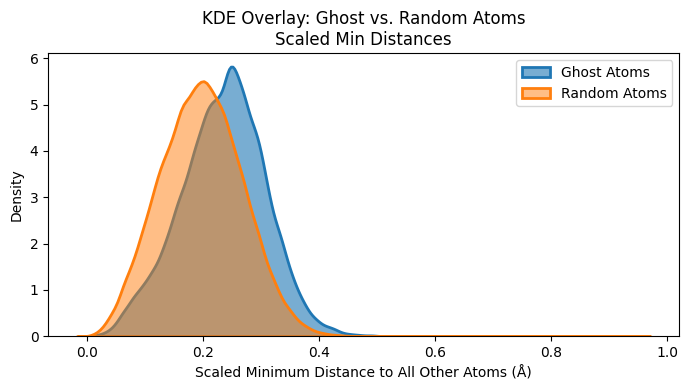

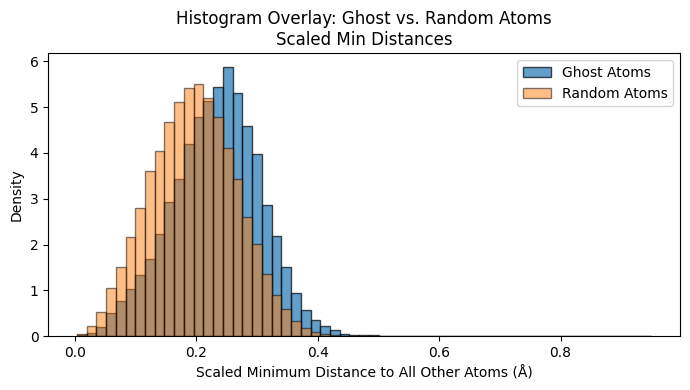

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Flatten ghost_min_distances, ignoring nan values
flat_ghost_min_dists = np.array([d for sublist in ghost_min_distances for d in sublist])
flat_ghost_min_dists = flat_ghost_min_dists[~np.isnan(flat_ghost_min_dists)]
# Flatten random_min_distances, ignoring nan values
flat_random_min_dists = np.array([d for sublist in random_min_distances for d in sublist])
flat_random_min_dists = flat_random_min_dists[~np.isnan(flat_random_min_dists)]

print("--- Ghost atoms statistics ---")
print(f'Mean:   {np.mean(flat_ghost_min_dists):.4f}')
print(f'Median: {np.median(flat_ghost_min_dists):.4f}')
print(f'Std:    {np.std(flat_ghost_min_dists):.4f}')

print("--- Random atoms statistics ---")
print(f'Mean:   {np.mean(flat_random_min_dists):.4f}')
print(f'Median: {np.median(flat_random_min_dists):.4f}')
print(f'Std:    {np.std(flat_random_min_dists):.4f}')

plt.figure(figsize=(7, 4))
# KDE plot overlay
sns.kdeplot(flat_ghost_min_dists, fill=True, label="Ghost Atoms", color="tab:blue", alpha=0.6, linewidth=2)
sns.kdeplot(flat_random_min_dists, fill=True, label="Random Atoms", color="tab:orange", alpha=0.5, linewidth=2)
plt.xlabel("Scaled Minimum Distance to All Other Atoms (Å)")
plt.ylabel("Density")
plt.title("KDE Overlay: Ghost vs. Random Atoms\nScaled Min Distances")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
bins = np.linspace(
    min(flat_ghost_min_dists.min(), flat_random_min_dists.min()),
    max(flat_ghost_min_dists.max(), flat_random_min_dists.max()),
    60,
)
plt.hist(flat_ghost_min_dists, bins=bins, alpha=0.7, color="tab:blue", edgecolor="black", label="Ghost Atoms", density=True)
plt.hist(flat_random_min_dists, bins=bins, alpha=0.5, color="tab:orange", edgecolor="black", label="Random Atoms", density=True)
plt.xlabel("Scaled Minimum Distance to All Other Atoms (Å)")
plt.ylabel("Density")
plt.title("Histogram Overlay: Ghost vs. Random Atoms\nScaled Min Distances")
plt.legend()
plt.tight_layout()
plt.show()